In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 신경망 학습 

키워드: 손실함수, 경사하강법

추가자료: 퍼셉트론 수렴정리
https://freshrimpsushi.github.io/posts/perceptron-convergence-theorem/

딥러닝은 기존 기계학습에서 사용하던 방법보디 사람의 개입을 더욱 배제 할수 있게 해주는 중요한 특성을 지녔다.


이미지 분석을 예로들면 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.

훈련 데이터 vs 시험 데이터
-> 오버피팅을 피하기 위해


손실함수  


MSE(평균 제곱 오차)

In [ ]:
import numpy as np

In [ ]:
def mean_squared_error(data, prediction):
    return np.mean(np.sum((data - prediction)**2))

In [ ]:
t = np.array([0,0,0,1,0,0,0,0,0,0])

y = np.array([0,0,0,0,0,0,0,0,1,0])

In [ ]:
mean_squared_error(t,y)

2.0

CEE(교차 엔트로피 오차)

In [ ]:
def cropss_entropy_error(data,prediction):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# 미니배치 학습
데이터의 일부분만 골라 학습을 진행함(여기서는 100개)

In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥_딥러닝')

In [ ]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/밑바닥_딥러닝']

In [ ]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
batch_mask

array([58909, 32906, 47725,  8617, 55672, 58506, 13476, 55973, 44933,
       34608])

# (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) / batch_size

In [ ]:
# one-hot-labeling이 안 되어 있을때
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

# 수치 미분
중앙 차분을 사용하도록 한다.  
h = 1e-4

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [ ]:
## 편미분

In [ ]:
def function_2(x):
    # return np.sum(x**2)
    return x[0]**2 +x[1]**2

In [ ]:
def numerical_gradient(f, x):
    h =  1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값복원

    return grad


In [ ]:
import numpy as np

In [ ]:
x = np.array([3,4,1])

In [ ]:
x.size

3

# 경사 하강법

In [ ]:
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x
    

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [ ]:
init_x = np.array([-3.0, 3.0])

In [ ]:
gradient_descent(function_2, init_x= init_x, lr = 0.01, step_num=1000)

array([-5.04890207e-09,  5.04890207e-09])

In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥_딥러닝')

In [ ]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [ ]:
class simpleNet:
    def __init__(self):
        self.W = np.random.rand(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()

In [ ]:
print(net.W)

[[0.72007869 0.57980144 0.18305162]
 [0.87924602 0.63082924 0.25720878]]


In [ ]:
x = np.array([0.6, 0.9])

In [ ]:
p = net.predict(x)
p

array([1.22336863, 0.91562718, 0.34131888])

In [ ]:
np.argmax(p)

0

In [ ]:
t = np.array([0, 1, 0])
net.loss(x, t)

1.0727618953236746

In [ ]:
def f(W):
    return net.loss(x, t)

In [ ]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.27919449, -0.39476246,  0.11556797],
       [ 0.41879173, -0.59214369,  0.17335196]])

In [ ]:
f = lambda w: net.loss(x, t)

In [ ]:
dW = numerical_gradient(f, net.W)
dW

array([[ 0.27919449, -0.39476246,  0.11556797],
       [ 0.41879173, -0.59214369,  0.17335196]])

# 2층 신경망 클래스 구현하기

In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥_딥러닝')
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


# 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from common.two_layer_net import TwoLayerNet
import time
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

#하이퍼파라미터
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    start = time.time()
    # SGD 사용
    batch_mask = np.random.choice(train_size, batch_size, replace= False)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    end = time.time()
    print(i, 'th end, time:', round(end-start,4))

# 문제점: 시간이 너무 오래걸린다.
#         학습과정에서 데이터의 중복이 계속해서 일어난다.
#         심지어 책에서는 np.random.choice(train_size, batch_size)를 사용함으로서 데이터의 중복이 한번더 일어나게 된다.

0 th end, time: 100.1351
1 th end, time: 99.6813
2 th end, time: 101.5621
3 th end, time: 100.8011
4 th end, time: 101.5965
5 th end, time: 100.9326
6 th end, time: 101.4354


KeyboardInterrupt: ignored

<function matplotlib.pyplot.show>

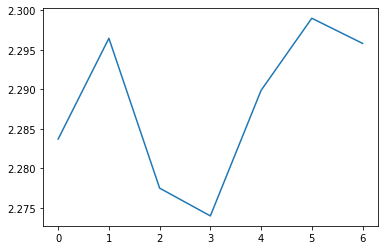

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.show

In [ ]:
a = np.random.choice(10, 9, replace= False)
a

array([9, 2, 3, 7, 1, 8, 4, 5, 0])

In [ ]:
a = np.random.choice(10, 9, replace= True)
a

array([2, 3, 7, 1, 6, 3, 7, 5, 7])

In [ ]:
a = np.random.choice(10, 9) #defalt = True
a

array([7, 3, 0, 7, 2, 6, 3, 9, 3])

In [ ]:
## 시간비교
start = time.time()
for i in range(1000):
    batch_mask = np.random.choice(train_size, batch_size, replace= False)
end = time.time()

print(end-start)

1.2572362422943115


In [ ]:
## 시간비교
start = time.time()
for i in range(1000):
    batch_mask = np.random.choice(train_size, batch_size, replace= True)
end = time.time()

print(end-start)

0.05522799491882324


https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

# 시험 데이터 평가하기

In [ ]:
# 시간이 너무 오래걸림으로 이후에 오차역전법을 다룬후에 작업하도록 하자.